In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

In [2]:
df = pd.read_csv('brain stroke.csv')

In [3]:
df.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.6,formerly smoked,1
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,NaN,never smoked,1
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.5,never smoked,1
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.4,smokes,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.0,never smoked,1


In [5]:
df.shape

(5110, 12)

In [6]:
mean_bmi = df['bmi'].mean()

In [7]:
df['bmi'] = df['bmi'].fillna(mean_bmi)

In [8]:
df.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
dtype: int64

In [9]:
df2 = pd.get_dummies(df[['gender','ever_married','work_type','Residence_type','smoking_status']],drop_first=True)

In [10]:
df2.head()

,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,1,0,1,0,1,0,0,1,1,0,0
1,0,0,1,0,0,1,0,0,0,1,0
2,1,0,1,0,1,0,0,0,0,1,0
3,0,0,1,0,1,0,0,1,0,0,1
4,0,0,1,0,0,1,0,0,0,1,0


In [11]:
df3 = pd.concat([df,df2],axis=1)

In [12]:
df3.head()

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,...,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,Male,67.0,0,1,Yes,Private,Urban,228.69,36.600000,...,0,1,0,1,0,0,1,1,0,0
1,51676,Female,61.0,0,0,Yes,Self-employed,Rural,202.21,28.893237,...,0,1,0,0,1,0,0,0,1,0
2,31112,Male,80.0,0,1,Yes,Private,Rural,105.92,32.500000,...,0,1,0,1,0,0,0,0,1,0
3,60182,Female,49.0,0,0,Yes,Private,Urban,171.23,34.400000,...,0,1,0,1,0,0,1,0,0,1
4,1665,Female,79.0,1,0,Yes,Self-employed,Rural,174.12,24.000000,...,0,1,0,0,1,0,0,0,1,0


In [13]:
df3 = df3.drop(['gender','ever_married','work_type','Residence_type','smoking_status'],axis=1)

In [14]:
df3.head()

,id,age,hypertension,heart_disease,avg_glucose_level,bmi,stroke,gender_Male,gender_Other,ever_married_Yes,work_type_Never_worked,work_type_Private,work_type_Self-employed,work_type_children,Residence_type_Urban,smoking_status_formerly smoked,smoking_status_never smoked,smoking_status_smokes
0,9046,67.0,0,1,228.69,36.600000,1,1,0,1,0,1,0,0,1,1,0,0
1,51676,61.0,0,0,202.21,28.893237,1,0,0,1,0,0,1,0,0,0,1,0
2,31112,80.0,0,1,105.92,32.500000,1,1,0,1,0,1,0,0,0,0,1,0
3,60182,49.0,0,0,171.23,34.400000,1,0,0,1,0,1,0,0,1,0,0,1
4,1665,79.0,1,0,174.12,24.000000,1,0,0,1,0,0,1,0,0,0,1,0


In [15]:
data = df3.copy()

In [16]:
X = data.drop('stroke',axis=1)

In [17]:
y = data['stroke']

In [18]:
from sklearn.model_selection import train_test_split

In [19]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [21]:
y_train.value_counts()

0    3404
1     173
Name: stroke, dtype: int64

In [23]:
from collections import Counter

In [24]:
Counter(y_train)

Counter({0: 3404, 1: 173})

In [27]:
from imblearn.combine import SMOTETomek

In [28]:
os=SMOTETomek(0.75)
X_train_ns,y_train_ns=os.fit_resample(X_train,y_train)
print("The number of classes before fit {}".format(Counter(y_train)))
print("The number of classes after fit {}".format(Counter(y_train_ns)))

C:\Users\lenovo\anaconda3\envs\deep learning\lib\site-packages\imblearn\utils\_validation.py:591: FutureWarning: Pass sampling_strategy=0.75 as keyword args. From version 0.9 passing these as positional arguments will result in an error
  FutureWarning,


The number of classes before fit Counter({0: 3404, 1: 173})
The number of classes after fit Counter({0: 3177, 1: 2326})


In [29]:
from sklearn.preprocessing import MinMaxScaler

In [30]:
mc = MinMaxScaler()

In [31]:
X_train_ns = mc.fit_transform(X_train_ns)

In [32]:
X_test = mc.transform(X_test)

In [36]:
X_train_ns.shape

(5503, 17)

In [33]:
import tensorflow

In [34]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense,Dropout

In [69]:
model = Sequential()

In [70]:
model.add(Dense(50,input_dim = 17,activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(50,input_dim = 17,activation = 'relu', kernel_initializer='he_uniform'))
model.add(Dropout(0.5))

model.add(Dense(1,activation = 'sigmoid'))

In [71]:
model.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [72]:
model_history = model.fit(X_train_ns,y_train_ns,validation_split=0.3,epochs=100)

Epoch 1/100
121/121 [==============================] - 1s 5ms/step - loss: 0.6018 - accuracy: 0.6901 - val_loss: 1.2736 - val_accuracy: 0.0242
Epoch 2/100
121/121 [==============================] - 1s 6ms/step - loss: 0.4003 - accuracy: 0.8378 - val_loss: 1.0682 - val_accuracy: 0.2925
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 0.3883 - accuracy: 0.8471 - val_loss: 0.9073 - val_accuracy: 0.4609
Epoch 4/100
121/121 [==============================] - 0s 4ms/step - loss: 0.3382 - accuracy: 0.8616 - val_loss: 0.7997 - val_accuracy: 0.5427
Epoch 5/100
121/121 [==============================] - 0s 4ms/step - loss: 0.3136 - accuracy: 0.8816 - val_loss: 0.7426 - val_accuracy: 0.5790
Epoch 6/100
121/121 [==============================] - 0s 3ms/step - loss: 0.3359 - accuracy: 0.8643 - val_loss: 0.7619 - val_accuracy: 0.5760
Epoch 7/100
121/121 [==============================] - 0s 4ms/step - loss: 0.3249 - accuracy: 0.8757 - val_loss: 0.7712 - val_accuracy: 0.5712

Epoch 58/100
121/121 [==============================] - 1s 5ms/step - loss: 0.2397 - accuracy: 0.8981 - val_loss: 0.5436 - val_accuracy: 0.7214
Epoch 59/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2315 - accuracy: 0.9079 - val_loss: 0.5880 - val_accuracy: 0.6929
Epoch 60/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2374 - accuracy: 0.8925 - val_loss: 0.5244 - val_accuracy: 0.7323
Epoch 61/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2354 - accuracy: 0.9025 - val_loss: 0.5267 - val_accuracy: 0.7299
Epoch 62/100
121/121 [==============================] - 0s 4ms/step - loss: 0.2300 - accuracy: 0.8991 - val_loss: 0.5799 - val_accuracy: 0.7081
Epoch 63/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2282 - accuracy: 0.8979 - val_loss: 0.5530 - val_accuracy: 0.7105
Epoch 64/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2355 - accuracy: 0.9067 - val_loss: 0.6065 - val_accuracy:

In [73]:
model_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

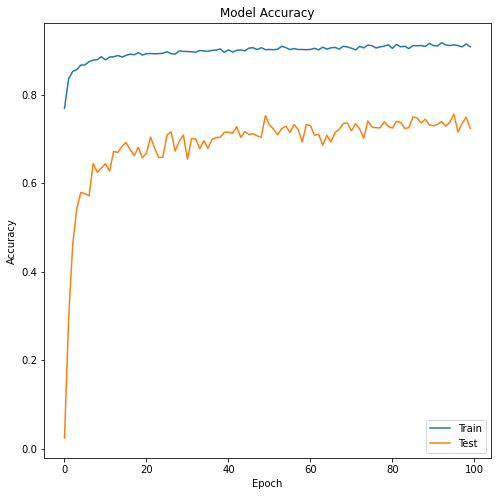

In [74]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['accuracy'])
plt.plot(model_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

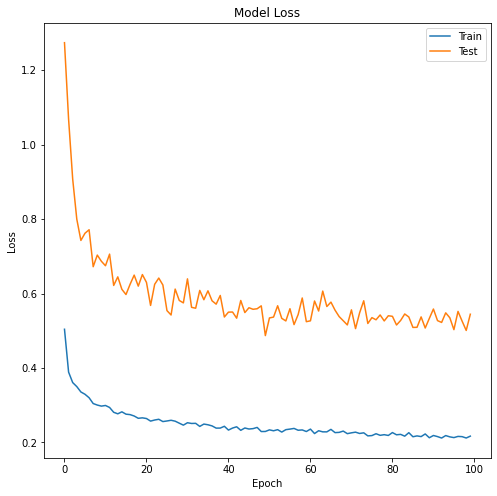

In [75]:
plt.figure(figsize=(8,8))
plt.plot(model_history.history['loss'])
plt.plot(model_history.history['val_loss'])
plt.title('Model Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='upper right')
plt.show()

In [76]:
pred = model.predict(X_test)

In [77]:
pred = pred>0.5

In [88]:
from sklearn.metrics import accuracy_score,confusion_matrix

In [89]:
accuracy_score(y_test,pred)*100

92.04174820613177

In [90]:
confusion_matrix(y_test,pred)

array([[1405,   52],
       [  70,    6]], dtype=int64)

In [91]:
from tensorflow.keras.callbacks import EarlyStopping

In [92]:
early_stop = EarlyStopping(monitor='val_loss',mode='min',verbose=1,patience=20)

In [93]:
model1 = Sequential()

In [95]:
model1.add(Dense(50,input_dim = 17,activation = 'relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))

model1.add(Dense(50,input_dim = 17,activation = 'relu', kernel_initializer='he_uniform'))
model1.add(Dropout(0.5))

model1.add(Dense(1,activation = 'sigmoid'))

In [96]:
model1.compile(loss='binary_crossentropy', optimizer='adam',metrics=['accuracy'])

In [97]:
model1_history = model.fit(X_train_ns,y_train_ns,validation_split=0.3,epochs=100,callbacks=[early_stop])

Epoch 1/100
121/121 [==============================] - 0s 4ms/step - loss: 0.2213 - accuracy: 0.9091 - val_loss: 0.5076 - val_accuracy: 0.7468
Epoch 2/100
121/121 [==============================] - 1s 6ms/step - loss: 0.2202 - accuracy: 0.9073 - val_loss: 0.5319 - val_accuracy: 0.7347
Epoch 3/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2166 - accuracy: 0.9174 - val_loss: 0.5163 - val_accuracy: 0.7420
Epoch 4/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2105 - accuracy: 0.9099 - val_loss: 0.5384 - val_accuracy: 0.7359
Epoch 5/100
121/121 [==============================] - 0s 3ms/step - loss: 0.2173 - accuracy: 0.9112 - val_loss: 0.5584 - val_accuracy: 0.7359
Epoch 6/100
121/121 [==============================] - 1s 4ms/step - loss: 0.2153 - accuracy: 0.9136 - val_loss: 0.5543 - val_accuracy: 0.7305
Epoch 7/100
121/121 [==============================] - 1s 5ms/step - loss: 0.2174 - accuracy: 0.9133 - val_loss: 0.5229 - val_accuracy: 0.7377

In [99]:
model1_history.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

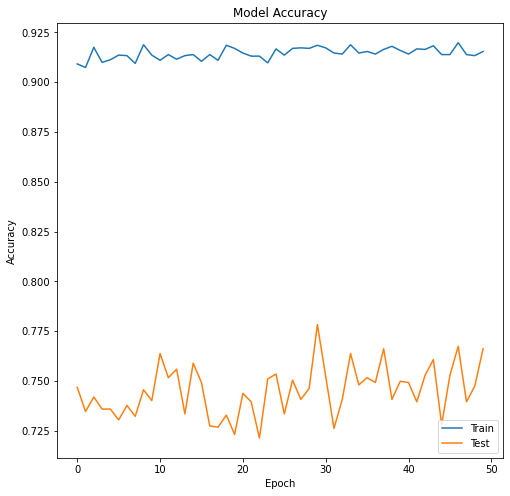

In [100]:
plt.figure(figsize=(8,8))
plt.plot(model1_history.history['accuracy'])
plt.plot(model1_history.history['val_accuracy'])
plt.title('Model Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Test'], loc='lower right')
plt.show()

In [105]:
accuracy_score(y_test,y_pred)

0.5048923679060665